In [18]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import model_selection
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics
import seaborn as sns
import pickle
from sklearn.metrics import roc_curve,roc_auc_score
cat_encoder = OneHotEncoder( )
ordinal_encoder = OrdinalEncoder()

data = pd.read_csv("heart_2020_cleaned.csv")
data.head()

obj_cols = data.select_dtypes(include='object').columns[1:]
num_cols = data.select_dtypes(exclude='object').columns


Object columns : Index(['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
       'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

Numberical columns : Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')


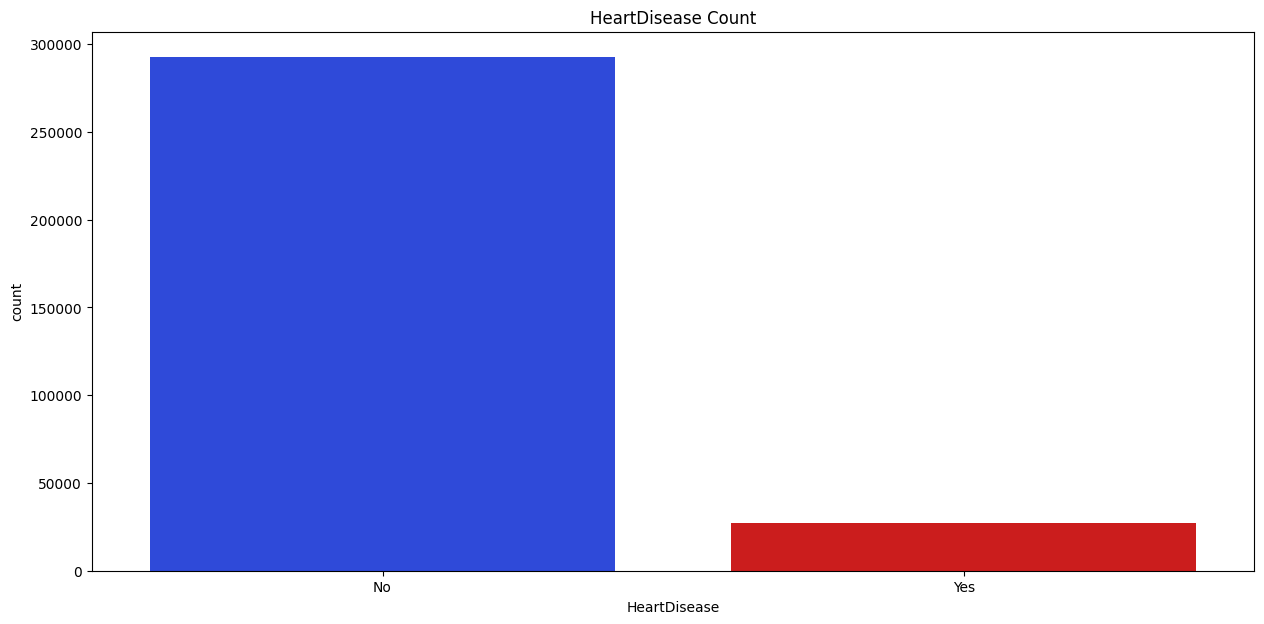

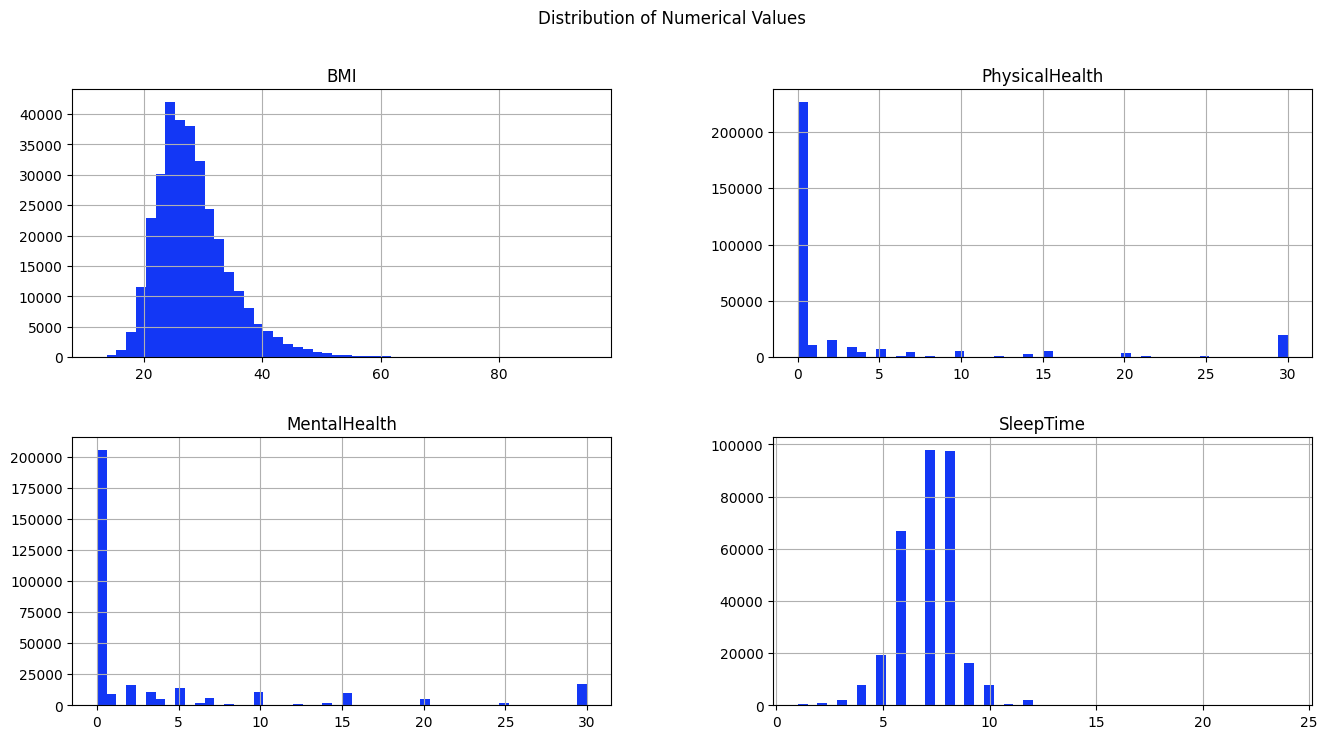

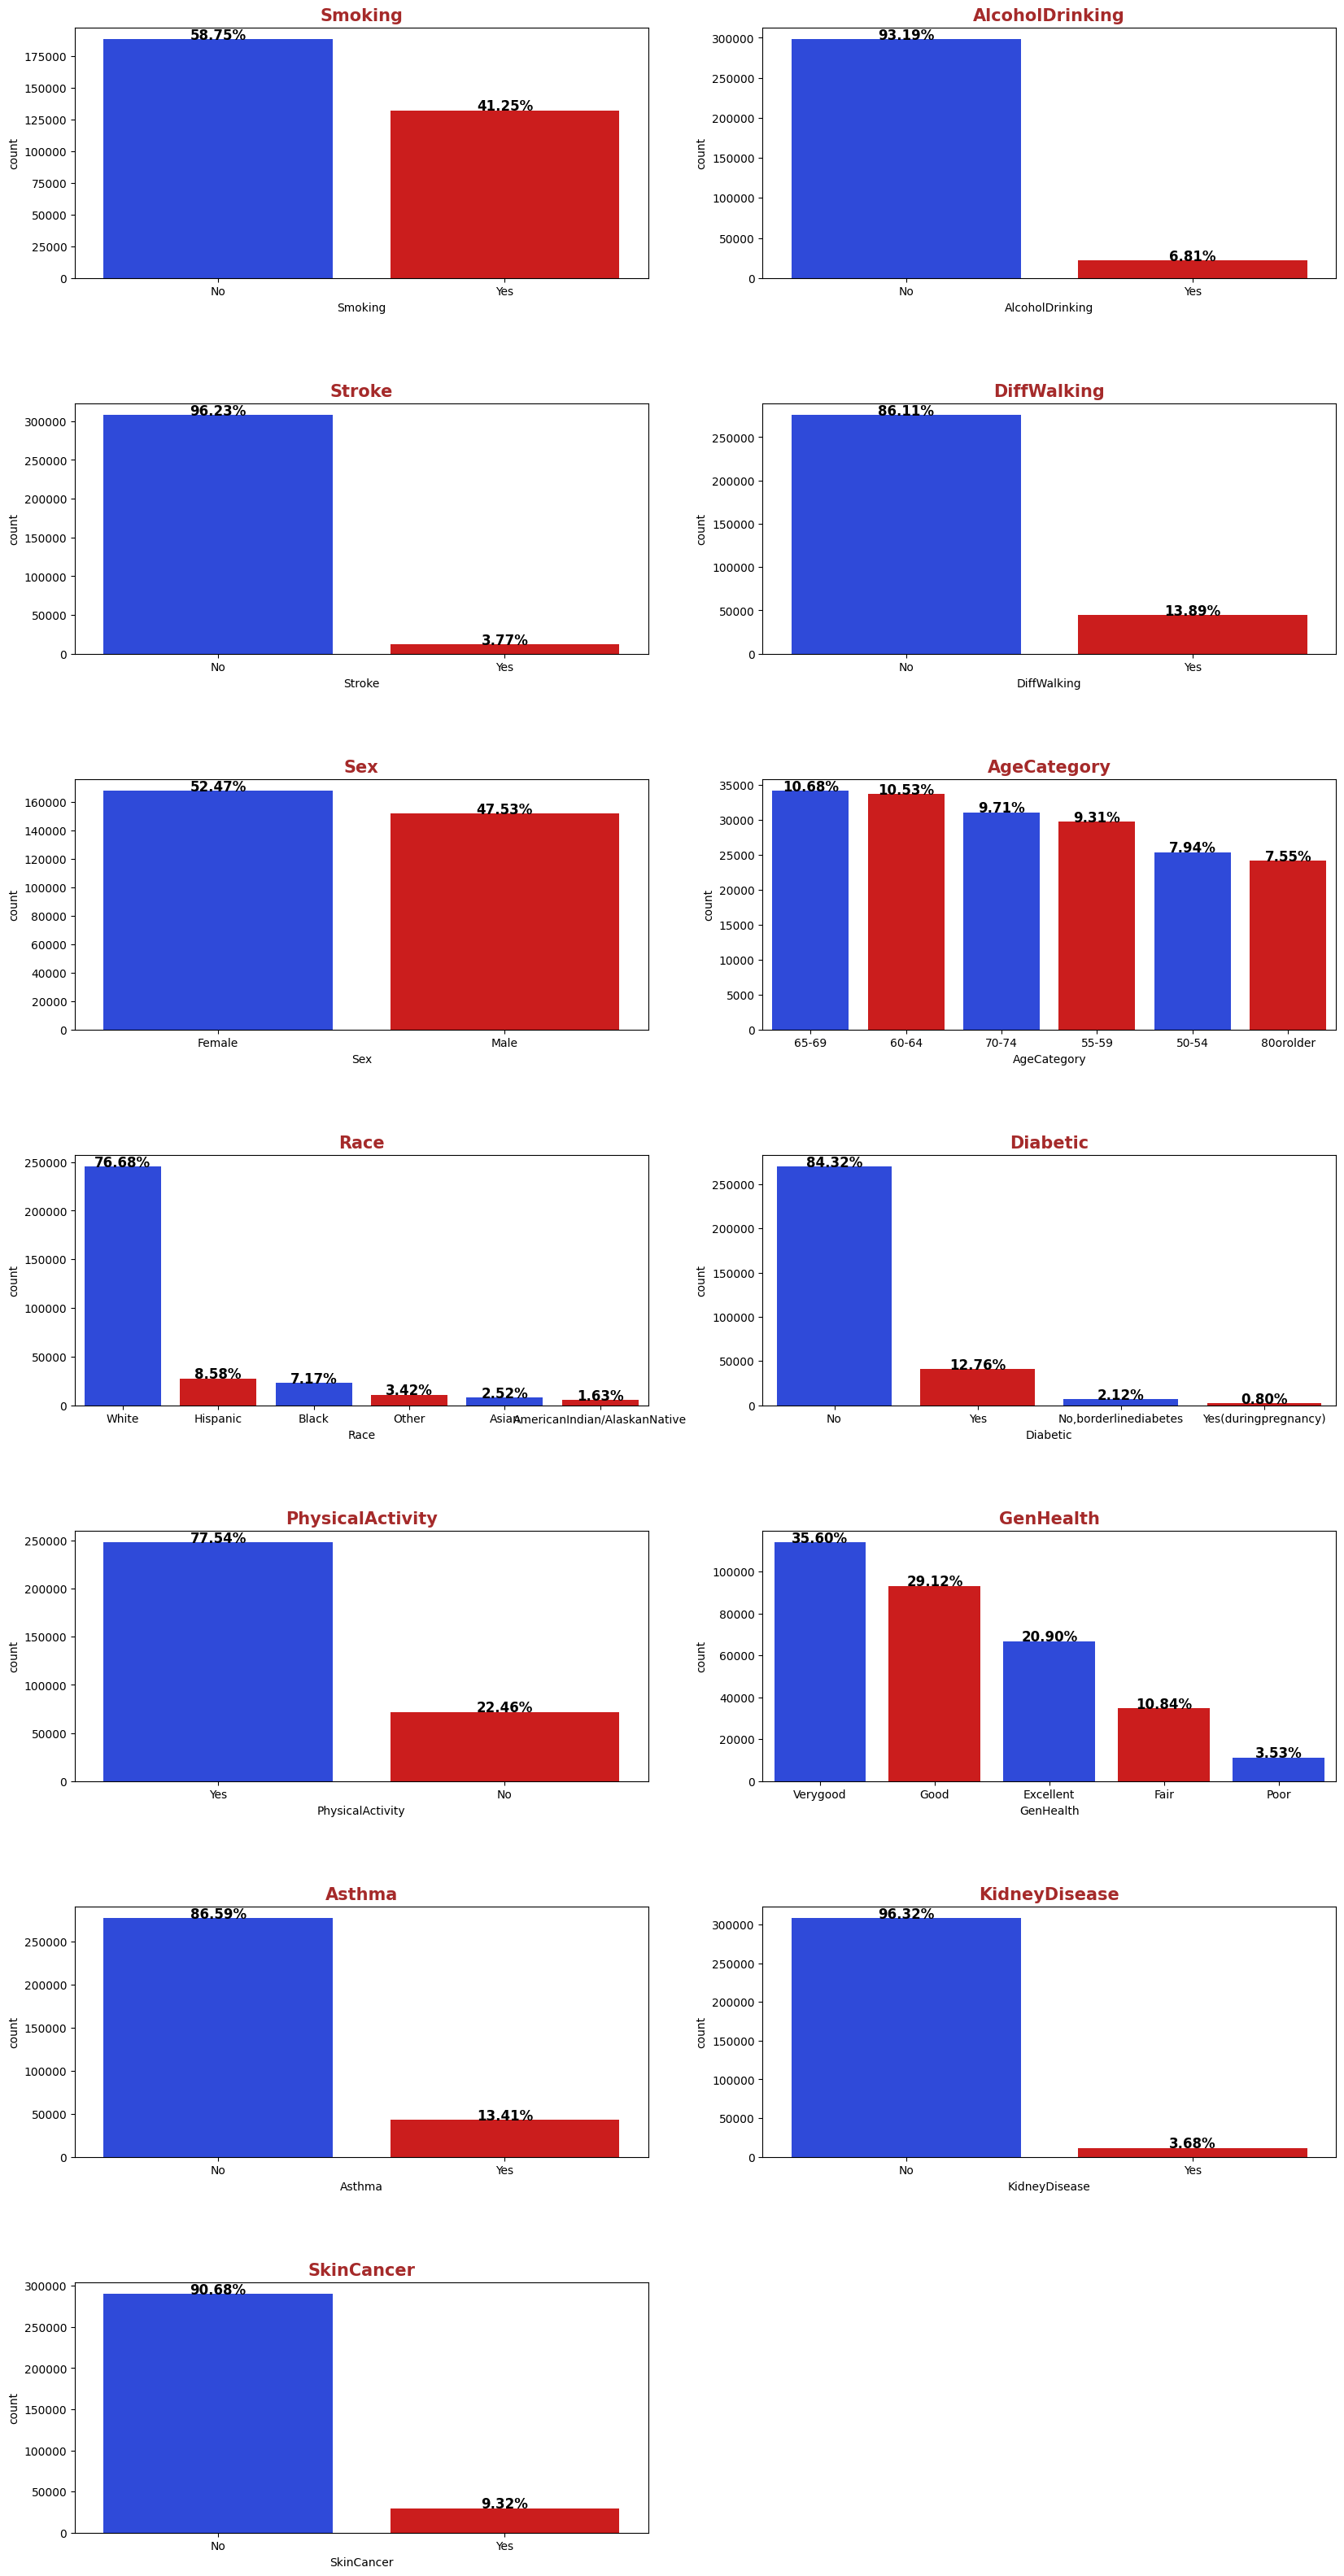

In [19]:
#plot
colors2 = sns.color_palette(['#1337f5', '#E80000'], 2)
colors1 = sns.color_palette(['#1337f5'], 1)
plt.figure(figsize=(15,7))
plt.title('HeartDisease Count') 
sns.countplot(data=data, x='HeartDisease', palette=colors2, order=data['HeartDisease'].value_counts().index)
data.hist(figsize=(16, 8), bins=50, color=colors1) 
plt.suptitle("Distribution of Numerical Values") 


print(f'Object columns : {obj_cols}', end='\n\n')
print(f'Numberical columns : {num_cols}')
plt.figure(figsize=(20, 40))
for i in range(len(obj_cols)):
  plt.subplot(7, 2, i+1)

  if(data[obj_cols[i]].nunique() < 3):
    ax = sns.countplot(data=data, x=obj_cols[i], palette=colors2, order=data[obj_cols[i]].value_counts().index[:6])
  else:
    ax = sns.countplot(data=data, x=obj_cols[i], palette=colors2, order=data[obj_cols[i]].value_counts().index[:6])

  
  plt.title(f'{obj_cols[i]}', fontsize=15, fontweight='bold', color='brown')
  plt.subplots_adjust(hspace=0.5)

  for p in ax.patches:
    height = p.get_height() 
    width = p.get_width()
    percent = height/len(data)

    ax.text(x=p.get_x()+width/2, y=height+2, s=format(percent, ".2%"), fontsize=12, ha='center', weight='bold')

In [20]:
for i in range(len(num_cols)):
    data[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']] = StandardScaler().fit_transform(data[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']])
for i in obj_cols:
    data[[i]] = OrdinalEncoder().fit_transform(data[[i]])
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,-1.844750,1.0,0.0,0.0,-0.046751,3.281069,0.0,0.0,7.0,5.0,2.0,1.0,4.0,-1.460354,1.0,0.0,1.0
1,No,-1.256338,0.0,0.0,1.0,-0.424070,-0.490039,0.0,0.0,12.0,5.0,0.0,1.0,4.0,-0.067601,0.0,0.0,0.0
2,No,-0.274603,1.0,0.0,0.0,2.091388,3.281069,0.0,1.0,9.0,5.0,2.0,1.0,1.0,0.628776,1.0,0.0,0.0
3,No,-0.647473,0.0,0.0,0.0,-0.424070,-0.490039,0.0,0.0,11.0,5.0,0.0,0.0,2.0,-0.763977,0.0,0.0,1.0
4,No,-0.726138,0.0,0.0,0.0,3.097572,-0.490039,1.0,0.0,4.0,5.0,0.0,1.0,4.0,0.628776,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,-0.144019,1.0,0.0,0.0,0.456341,-0.490039,1.0,1.0,8.0,3.0,2.0,0.0,1.0,-0.763977,1.0,0.0,0.0
319791,No,0.238291,1.0,0.0,0.0,-0.424070,-0.490039,0.0,1.0,3.0,3.0,0.0,1.0,4.0,-1.460354,1.0,0.0,0.0
319792,No,-0.642753,0.0,0.0,0.0,-0.424070,-0.490039,0.0,0.0,5.0,3.0,0.0,1.0,2.0,-0.763977,0.0,0.0,0.0
319793,No,0.705560,0.0,0.0,0.0,-0.424070,-0.490039,0.0,0.0,1.0,3.0,0.0,0.0,2.0,3.414282,0.0,0.0,0.0


In [21]:
#Most of people in our data are white and have no diabetic.
#Most of them had done a physical activity during the past 30 days other than their regular job and in general they have very good health as they said.
#A litle of them who have asthma, kidney disease and skin cancer.
#Most people said that they have generaly very good health. A few of people who said that they have generaly a poor health.
data.corr()


/tmp/ipykernel_4627/3440329205.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
BMI,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,0.026940,-0.004744,-0.037424,0.202472,-0.150616,0.035932,-0.051822,0.092345,0.050768,-0.033644
Smoking,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,0.085052,0.128331,0.065499,0.053847,-0.097174,0.020625,-0.030336,0.024149,0.034920,0.033977
AlcoholDrinking,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,0.004200,-0.059528,0.036702,-0.057372,0.017487,0.001629,-0.005065,-0.002202,-0.028280,-0.005702
Stroke,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,-0.003091,0.137822,-0.003956,0.101518,-0.079455,-0.009335,0.011900,0.038866,0.091167,0.048116
PhysicalHealth,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,-0.040904,0.110763,-0.000847,0.151361,-0.232283,-0.035703,-0.061387,0.117907,0.142197,0.041700
MentalHealth,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,-0.100058,-0.155506,-0.014491,0.032945,-0.095808,-0.004412,-0.119717,0.114008,0.037281,-0.033412
DiffWalking,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,-0.068860,0.243263,-0.015831,0.205502,-0.278524,-0.043552,-0.022216,0.103222,0.153064,0.064840
Sex,0.026940,0.085052,0.004200,-0.003091,-0.040904,-0.100058,-0.068860,1.000000,-0.067478,0.018855,-0.013456,0.048247,-0.010283,-0.015704,-0.069191,-0.009084,0.013434
AgeCategory,-0.004744,0.128331,-0.059528,0.137822,0.110763,-0.155506,0.243263,-0.067478,1.000000,0.163090,0.193745,-0.121687,0.044427,0.104953,-0.058108,0.123190,0.263537
Race,-0.037424,0.065499,0.036702,-0.003956,-0.000847,-0.014491,-0.015831,0.018855,0.163090,1.000000,-0.052216,0.056767,0.050344,0.035889,-0.017975,0.003709,0.134780


In [22]:
#data=data.drop_duplicates()
#data.shape
print(data["Sex"].describe())

coulmn_data = data.columns
for col in coulmn_data:
    total = np.sum(data[col].isnull())
    print('{} - {}%'.format(col, round(total)))

count    319795.000000
mean          0.475273
std           0.499389
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Sex, dtype: float64
HeartDisease - 0%
BMI - 0%
Smoking - 0%
AlcoholDrinking - 0%
Stroke - 0%
PhysicalHealth - 0%
MentalHealth - 0%
DiffWalking - 0%
Sex - 0%
AgeCategory - 0%
Race - 0%
Diabetic - 0%
PhysicalActivity - 0%
GenHealth - 0%
SleepTime - 0%
Asthma - 0%
KidneyDisease - 0%
SkinCancer - 0%


In [23]:
cols = data.columns
num_cols = data._get_numeric_data().columns
Categ_cols=list(set(cols) - set(num_cols))
lenght=len(Categ_cols)
from sklearn.compose import make_column_transformer
for i in range (lenght):
    print('____________________________________________________________________________________')
    #Variable
    print('Variable name:' ,Categ_cols[i])
    #Unique values 
    print('Unique values are:', data[Categ_cols[i]].unique())
    #Number of unique values
    print('Number of unique values:',data[Categ_cols[i]].nunique())
    # Frequencies of categorical variables
    FreqValue=data[Categ_cols[i]].value_counts()
    print('Frequency of each unique value in a catagorical variable')
    print(FreqValue)


____________________________________________________________________________________
Variable name: HeartDisease
Unique values are: ['No' 'Yes']
Number of unique values: 2
Frequency of each unique value in a catagorical variable
No     292422
Yes     27373
Name: HeartDisease, dtype: int64


In [24]:
numerical = data.select_dtypes(exclude='object')
for col in numerical:
  
  Q1, Q3 = data[col].quantile([0.25,0.75])
  IQR = Q3 - Q1
  right = Q3 + 1.5 * IQR
  left = Q1 - 1.5 * IQR
  data[col] = np.where(data[col]>IQR, Q3, data[col])
  n = len(data.loc[(data[col] < left) | (data[col] > right)])
  print(f"{col}:\n\tOutlier Num = {n}\n\tOutlier Percentage = {n*100/len(data):.2f}%\n")
  # fit outs

BMI:
	Outlier Num = 45
	Outlier Percentage = 0.01%

Smoking:
	Outlier Num = 0
	Outlier Percentage = 0.00%

AlcoholDrinking:
	Outlier Num = 0
	Outlier Percentage = 0.00%

Stroke:
	Outlier Num = 0
	Outlier Percentage = 0.00%

PhysicalHealth:
	Outlier Num = 7606
	Outlier Percentage = 2.38%

MentalHealth:
	Outlier Num = 0
	Outlier Percentage = 0.00%

DiffWalking:
	Outlier Num = 0
	Outlier Percentage = 0.00%

Sex:
	Outlier Num = 0
	Outlier Percentage = 0.00%

AgeCategory:
	Outlier Num = 0
	Outlier Percentage = 0.00%

Race:
	Outlier Num = 5202
	Outlier Percentage = 1.63%

Diabetic:
	Outlier Num = 0
	Outlier Percentage = 0.00%

PhysicalActivity:
	Outlier Num = 71838
	Outlier Percentage = 22.46%

GenHealth:
	Outlier Num = 0
	Outlier Percentage = 0.00%

SleepTime:
	Outlier Num = 1339
	Outlier Percentage = 0.42%

Asthma:
	Outlier Num = 0
	Outlier Percentage = 0.00%

KidneyDisease:
	Outlier Num = 0
	Outlier Percentage = 0.00%

SkinCancer:
	Outlier Num = 0
	Outlier Percentage = 0.00%



In [25]:

#ordinal encoding won't make any sence here. Will prefer values with higher numbes
'''data["Diabetic"] = data["Diabetic"].replace(
    {
        "Yes" : 1,
        "Yes (during pregnancy)" : 2,
        "No, borderline diabetes" : 3,
        "No" : 3
    }
)'''  

#data["GenHealth"] = data["GenHealth"].replace(
 #   {
  #      'Excellent' : 4,
   #     'Very good' : 3,
    #    'Good' : 2,
     #   'Fair' : 1,
      #  'Poor' : 0
    #}
#)
'''
data[['Asthma']] = ordinal_encoder.fit_transform(data[['Asthma']])
data[['DiffWalking']] = ordinal_encoder.fit_transform(data[['DiffWalking']])
data[['PhysicalActivity']] = ordinal_encoder.fit_transform(data[['PhysicalActivity']])
data[['HeartDisease']] = ordinal_encoder.fit_transform(data[['HeartDisease']])
data[['KidneyDisease']] = ordinal_encoder.fit_transform(data[['KidneyDisease']])
data[['SkinCancer']] = ordinal_encoder.fit_transform(data[['SkinCancer']])
data[['Stroke']] = ordinal_encoder.fit_transform(data[['Stroke']])
data[['AlcoholDrinking']] = ordinal_encoder.fit_transform(data[['AlcoholDrinking']])
data[['Smoking']] = ordinal_encoder.fit_transform(data[['Smoking']])
data[['GenHealth']] = ordinal_encoder.fit_transform(data[['GenHealth']])
data[['Diabetic']] = ordinal_encoder.fit_transform(data[['Diabetic']])
data[['AgeCategory']] = ordinal_encoder.fit_transform(data[['AgeCategory']])
#data.replace("Yes",1,inplace=True)
#data.replace("No",0 ,inplace=True)
#data.replace("18-24",0,inplace=True)
#data.replace("25-29",1,inplace=True)
#data.replace("30-34",2,inplace=True)
#data.replace("35-39",3,inplace=True)
#data.replace("40-44",4,inplace=True) 
#data.replace("45-49",5,inplace=True)
#data.replace("50-54",6,inplace=True)
#data.replace("55-59",7,inplace=True)
#data.replace("60-64",8,inplace=True)
#data.replace("65-69",9,inplace=True)
#data.replace("70-74",10,inplace=True)
#data.replace("75-79",11,inplace=True)
#data.replace("80 or older",12,inplace=True)

data[['Race']] = ordinal_encoder.fit_transform(data[['Race']])

#data.replace("White",0,inplace=True)
#data.replace("Other",1,inplace=True)
#data.replace("Black",2,inplace=True)
#data.replace("Hispanic",3,inplace=True)
#data.replace("Asian",4,inplace=True)
#data.replace("American Indian/Alaskan Native", 4, inplace=True)

#one hot-encoding
#data.replace("Female",0,inplace=True)

gender = pd.get_dummies(data.Sex)
data = pd.concat([data, gender], axis='columns')
data.drop('Sex', axis=1, inplace=True)


'''

'\ndata[[\'Asthma\']] = ordinal_encoder.fit_transform(data[[\'Asthma\']])\ndata[[\'DiffWalking\']] = ordinal_encoder.fit_transform(data[[\'DiffWalking\']])\ndata[[\'PhysicalActivity\']] = ordinal_encoder.fit_transform(data[[\'PhysicalActivity\']])\ndata[[\'HeartDisease\']] = ordinal_encoder.fit_transform(data[[\'HeartDisease\']])\ndata[[\'KidneyDisease\']] = ordinal_encoder.fit_transform(data[[\'KidneyDisease\']])\ndata[[\'SkinCancer\']] = ordinal_encoder.fit_transform(data[[\'SkinCancer\']])\ndata[[\'Stroke\']] = ordinal_encoder.fit_transform(data[[\'Stroke\']])\ndata[[\'AlcoholDrinking\']] = ordinal_encoder.fit_transform(data[[\'AlcoholDrinking\']])\ndata[[\'Smoking\']] = ordinal_encoder.fit_transform(data[[\'Smoking\']])\ndata[[\'GenHealth\']] = ordinal_encoder.fit_transform(data[[\'GenHealth\']])\ndata[[\'Diabetic\']] = ordinal_encoder.fit_transform(data[[\'Diabetic\']])\ndata[[\'AgeCategory\']] = ordinal_encoder.fit_transform(data[[\'AgeCategory\']])\n#data.replace("Yes",1,inplace

In [26]:
trans = make_column_transformer(
    (OrdinalEncoder(), obj_cols),
    (StandardScaler(), num_cols),
    remainder='passthrough'
)

data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,-1.844750,1.0,0.0,0.0,-0.046751,-0.112928,0.0,0.0,9.0,5.0,0.0,1.0,4.0,-1.460354,0.0,0.0,0.0
1,No,-1.256338,0.0,0.0,0.0,-0.424070,-0.490039,0.0,0.0,9.0,5.0,0.0,1.0,4.0,-0.067601,0.0,0.0,0.0
2,No,-0.274603,1.0,0.0,0.0,-0.172524,-0.112928,0.0,1.0,9.0,5.0,0.0,1.0,1.0,0.628776,0.0,0.0,0.0
3,No,-0.647473,0.0,0.0,0.0,-0.424070,-0.490039,0.0,0.0,9.0,5.0,0.0,0.0,2.0,-0.763977,0.0,0.0,0.0
4,No,-0.726138,0.0,0.0,0.0,-0.172524,-0.490039,0.0,0.0,4.0,5.0,0.0,1.0,4.0,0.628776,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,-0.144019,1.0,0.0,0.0,-0.172524,-0.490039,0.0,1.0,9.0,5.0,0.0,0.0,1.0,-0.763977,0.0,0.0,0.0
319791,No,0.238291,1.0,0.0,0.0,-0.424070,-0.490039,0.0,1.0,3.0,5.0,0.0,1.0,4.0,-1.460354,0.0,0.0,0.0
319792,No,-0.642753,0.0,0.0,0.0,-0.424070,-0.490039,0.0,0.0,5.0,5.0,0.0,1.0,2.0,-0.763977,0.0,0.0,0.0
319793,No,0.705560,0.0,0.0,0.0,-0.424070,-0.490039,0.0,0.0,1.0,5.0,0.0,0.0,2.0,0.628776,0.0,0.0,0.0


In [27]:
#
#x_train_set, x_test, y_train_set,y_test_set = sklearn.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
#
#print(y_train_set.value_counts()/len(y_train_set))
#print(y_test_set.value_counts()/len(y_test_set))
#print(X.value_counts()/len(y_test_set))

In [28]:
def try_model(transformation, sampler, model, X_train, y_train, X_test, y_test):
    model_pipeline = Pipeline(steps=[
                                     ('sample', sampler),
                                     ('model', model)])
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)
    print(model_pipeline.score(X_test, y_test))
 
   
    print(f'Training Accuracy : {model_pipeline.score(X_train, y_train)}')
    print(f'Test Accuracy : {model_pipeline.score(X_test, y_test)}')
    #confusion_matrix(X_train, y_train)

    return y_pred, classification_report(y_test, y_pred)

In [29]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    [...]

object_ = StandardScaler()  
object_.fit_transform(data)  
    

ValueError: could not convert string to float: 'No'

In [30]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [31]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.

    Arguments
    ---------
    cf:            confusion matrix to be passed in

    group_names:   List of strings that represent the labels row by row to be shown in each square.

    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'

    count:         If True, show the raw number in the confusion matrix. Default is True.

    normalize:     If True, show the proportions for each category. Default is True.

    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.

    xyticks:       If True, show x and y ticks. Default is True.

    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.

    sum_stats:     If True, display summary statistics below the figure. Default is True.

    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.

    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.

    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

/home/ammat/ML/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6177450069888085
Training Accuracy : 0.6184543800071296
Test Accuracy : 0.6177450069888085
              precision    recall  f1-score   support

          No       0.97      0.60      0.74     97474
         Yes       0.16      0.80      0.26      9125

    accuracy                           0.62    106599
   macro avg       0.56      0.70      0.50    106599
weighted avg       0.90      0.62      0.70    106599

0.6241580517458114
Training Accuracy : 0.6279731891161695
Test Accuracy : 0.6241580517458114
              precision    recall  f1-score   support

          No       0.97      0.61      0.75     97474
         Yes       0.16      0.77      0.26      9124

    accuracy                           0.62    106598
   macro avg       0.56      0.69      0.50    106598
weighted avg       0.90      0.62      0.71    106598



/home/ammat/ML/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6273851291769076
Training Accuracy : 0.623770503337289
Test Accuracy : 0.6273851291769076
              precision    recall  f1-score   support

          No       0.97      0.61      0.75     97474
         Yes       0.16      0.79      0.27      9124

    accuracy                           0.63    106598
   macro avg       0.56      0.70      0.51    106598
weighted avg       0.90      0.63      0.71    106598

0.7125019934520962
Training Accuracy : 0.7145209103360288
Test Accuracy : 0.7125019934520962
              precision    recall  f1-score   support

          No       0.97      0.71      0.82     97474
         Yes       0.19      0.73      0.30      9125

    accuracy                           0.71    106599
   macro avg       0.58      0.72      0.56    106599
weighted avg       0.90      0.71      0.77    106599

0.7229122497607835
Training Accuracy : 0.7167080212198108
Test Accuracy : 0.7229122497607835
              precision    recall  f1-score   support

          No 

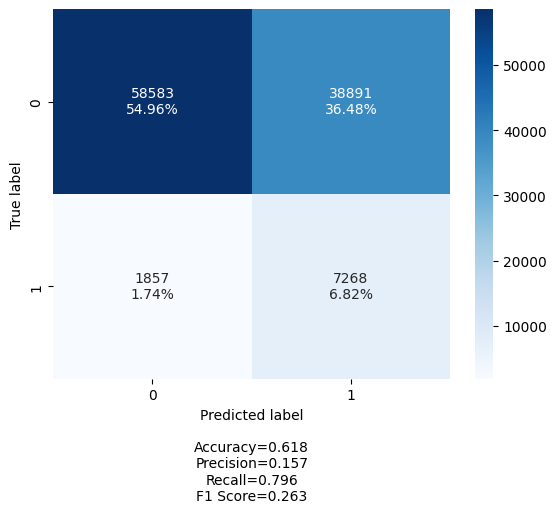

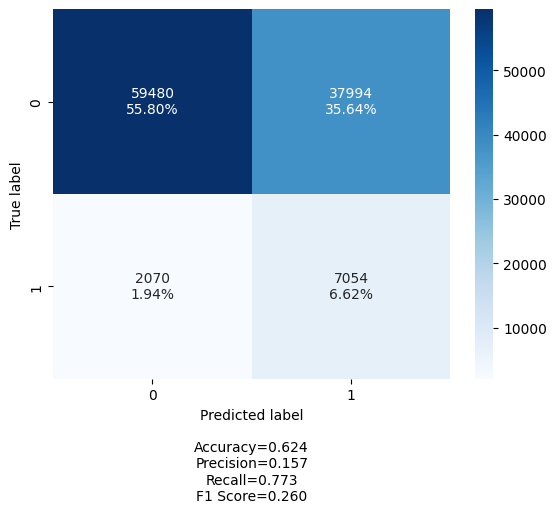

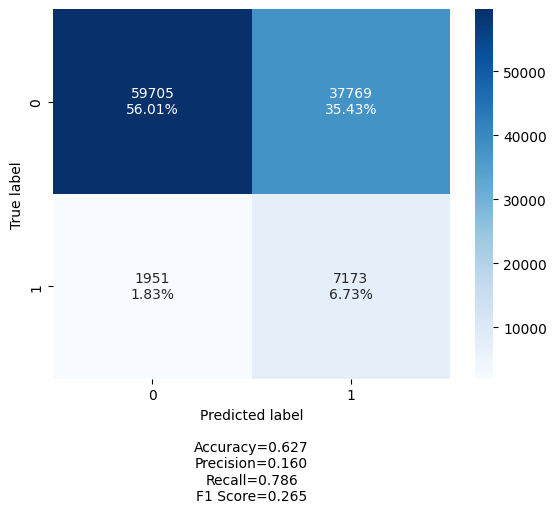

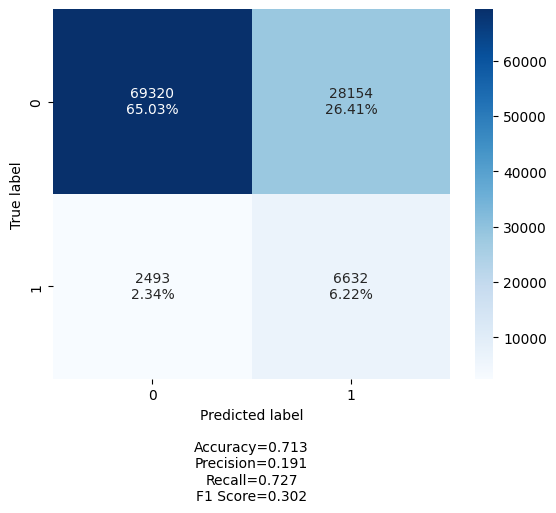

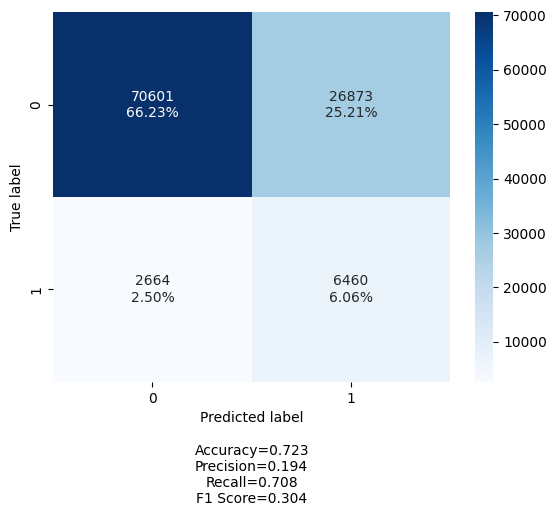

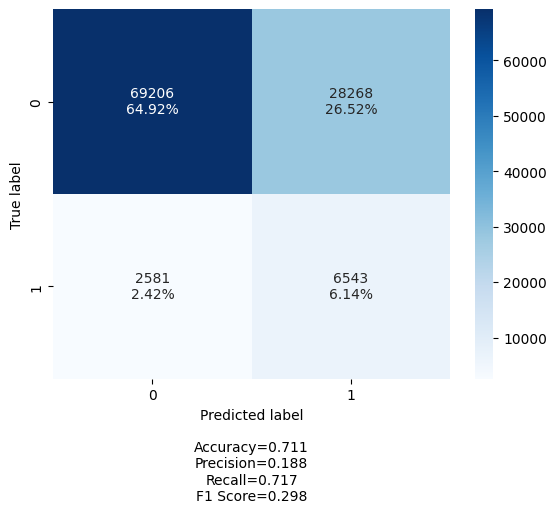

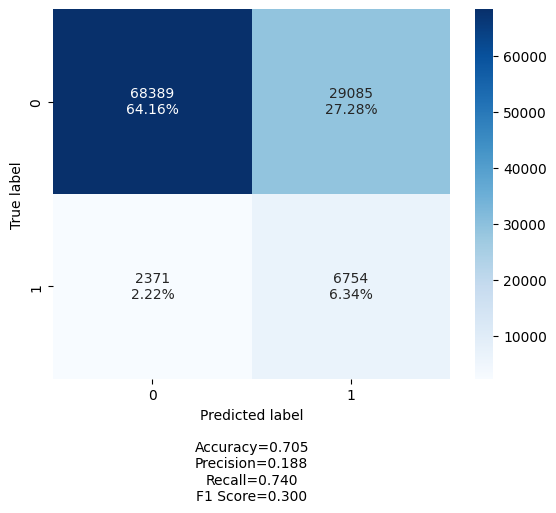

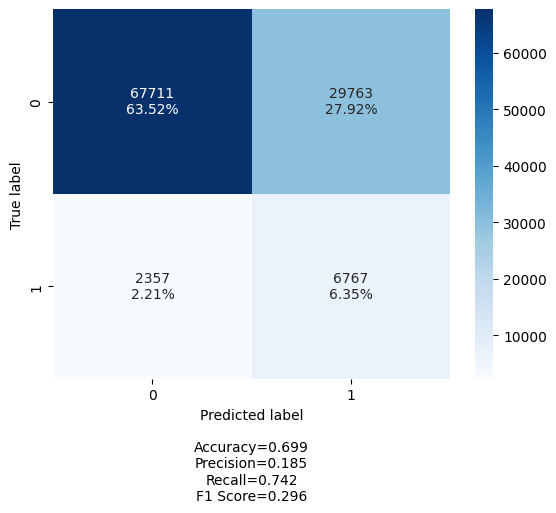

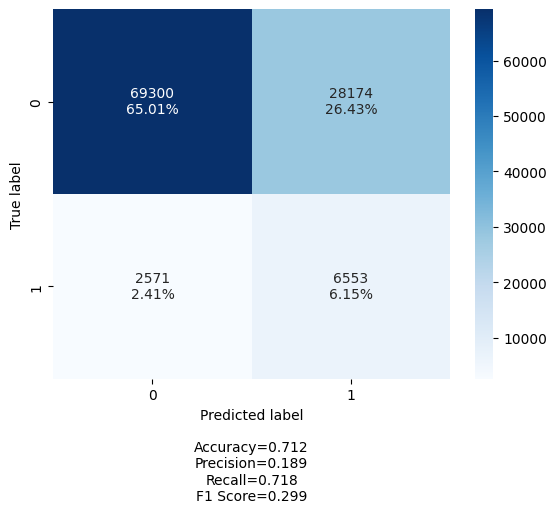

In [32]:
 
data.columns = data.columns.to_series().apply(lambda x: x.strip())
X = data.drop(columns=["HeartDisease"])

Y = data["HeartDisease"] 
methods=[LogisticRegression(C=1000), DecisionTreeClassifier(max_features=17, max_depth=10), RandomForestClassifier(max_features=17, max_depth=10)]
iterations = 0
best_recall = -10.0
best_pr = -10.0
while(iterations<len(methods)):
    kf = StratifiedKFold(n_splits=3)
    for train_index, test_index in kf.split(X, Y):
         
        x_train_set, x_test=X.reindex( train_index), X.reindex( test_index) 
        y_train_set, y_test_set = Y[train_index], Y[test_index]
 
        lr = methods[iterations]
        y_pred, report = try_model(trans,
                                SMOTE(random_state = 42),
                                lr,
                                x_train_set,
                                y_train_set,
                                x_test,
                                y_test_set)
        cm = confusion_matrix(y_test_set, y_pred)
        make_confusion_matrix(cm)
        print(report)
        recall  = recall_score(y_test_set, y_pred, average='micro')
        if recall > best_recall:
            best_recall = recall
            best_pr = precision_score(y_test_set, y_pred, average='micro')
            with open('best.pickle', 'wb') as f:
                pickle.dump(lr, f) 
 
        
    iterations+=1

In [33]:
'''clf = svm.SVC(kernel='linear', C=1)
clf.fit(x_train_set, y_train_set)
y_pred = clf.predic(x_test)
acc = metrics.accuracy_score(y_test_set, y_pred)
print(acc)
data.plot(kind='scatter', x='HeartDisease', y='Diabetic')
corr_matrix = data.corr()
corr_matrix['HeartDisease'].sort_values(ascending=False)'''
'''_'''

print(best_pr)
print(best_recall)

0.7229122497607835
0.7229122497607835


In [ ]:
#svm = svm.SVC(C=0.05, gamma=0.477)

#y_pred, report = try_model(svm,
 #                          x_train_set,
  ##                         y_train_set,
    #                       x_test,
     #                      y_test_set)

In [37]:
import pickle
'''
with open("model.pickle", "wb") as f:
    pickle.dump(clf, f)
'''
pickle_in = open("best.pickle", 'rb')
clf = pickle.load(pickle_in)
print(clf.predict(x_test))
print(clf.score(x_test, y_test_set))




['No' 'No' 'Yes' ... 'No' 'No' 'Yes']
0.7167489071089513
